In [37]:
import numpy as np
import seaborn as sns
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# I chose a data set on concrete strength and physical properties
# I believe that this data will be good for reggression because its target variable is 
# a continous variable and all of its features effect its strength.
concrete_df=pd.read_excel(r'C:\Users\pad39\Downloads\Concrete_Data.xls')
concrete_df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [3]:
concrete_df.values[:,:8]

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [4]:
concrete_df.values[:,8]

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

In [5]:
x_train,x_test,y_train,y_test=train_test_split(concrete_df.values[:,:8],concrete_df.values[:,8])

In [6]:
regr=linear_model.LinearRegression()

In [7]:
regr.fit(x_train,y_train)

LinearRegression()

In [8]:
# All regression coefficients are less than one so no single feature has a major 
# impact on the target feature.
regr.coef_

array([ 0.11459834,  0.09845878,  0.07511934, -0.2150537 ,  0.24560922,
        0.01012807,  0.00528365,  0.11819224])

In [9]:
concrete_df_pred=regr.predict(x_test)

In [10]:
# after compting the error in each prediction and squaring and averageing them
# the mean squared error came out to 120
mean_squared_error(y_test,concrete_df_pred)

117.77710193261402

In [11]:
# The best value of the r2 score is 1 and this model return an r2 of .56
r2_score(y_test,concrete_df_pred)

0.4741802925439028

In [12]:
errors = np.sum(x_test*regr.coef_,axis=1) + regr.intercept_ -concrete_df_pred
errors

array([-3.55271368e-15,  0.00000000e+00, -1.42108547e-14,  1.42108547e-14,
        0.00000000e+00,  3.55271368e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.55271368e-15, -1.42108547e-14,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.55271368e-15,  0.00000000e+00,  3.55271368e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.55271368e-15, -3.55271368e-15, -3.55271368e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.10542736e-15,
       -3.55271368e-15,  3.55271368e-15, -3.55271368e-15,  0.00000000e+00,
        3.55271368e-15,  0.00000000e+00,  3.55271368e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.42108547e-14, -3.55271368e-15,
        0.00000000e+00,  3.55271368e-15,  1.42108547e-14, -3.55271368e-15,
        3.55271368e-15,  0.00000000e+00,  7.10542736e-15,  0.00000000e+00,
        0.00000000e+00,  

In [13]:
# because the max error in the model was small this implies that model is functioning correctly
np.max(errors)

1.4210854715202004e-14

In [14]:
x_test[0]

array([310.,   0.,   0., 192.,   0., 970., 850.,  90.])

In [15]:
col_name=['Cement (component 1)(kg in a m^3 mixture)',
          'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
          'Fly Ash (component 3)(kg in a m^3 mixture)',
          'Water (component 4)(kg in a m^3 mixture)',
          'Superplasticizer (component 5)(kg in a m^3 mixture)',
          'Coarse Aggregate (component 6)(kg in a m^3 mixture)',
          'Fine Aggregate (component 7)(kg in a m^3 mixture)',
          'Age (day)']

In [16]:
#I created a dataframe out of the x_test data to compare the and inspect the errors in the predictions
test_df = pd.DataFrame(data=x_test, columns = col_name)

In [17]:
# making two new columns of the y_test and concrete_df_pred data
test_df['y_test']=y_test
test_df['y_pred']=concrete_df_pred

In [18]:
error= lambda r: r['y_test']-r['y_pred']
test_df['pred_error']=test_df.apply(error,axis=1)

In [19]:
test_df['error']=y_test-concrete_df_pred

In [20]:
test_df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),y_test,y_pred,pred_error,error
0,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90.0,34.680643,29.654243,5.026400,5.026400
1,250.0,0.0,0.0,182.0,0.0,1100.0,820.0,7.0,12.734622,16.277063,-3.542442,-3.542442


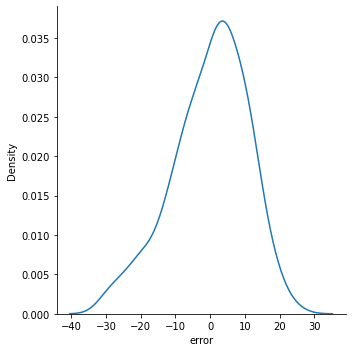

In [21]:
# The following graph was made by plotting the errors in the predictions by the regression model
# As you can see we know that the model is operating well because the error of the predictions all fall close to
# zero meaning the predictions were not very far off from the test data
sns.displot(data=test_df, x='error', kind='kde')

In [22]:
concrete_df.values[:,5]

array([1040. , 1055. ,  932. , ...,  892.4,  989.6,  864.5])

In [23]:
# the x_train data was 1 demensional because we are now only using one feature 
# so I fixed this with the code [np.newaxis,5]
x_train,x_test,y_train,y_test=train_test_split(concrete_df.values[:,np.newaxis,5],concrete_df.values[:,-1])

In [24]:
regr=linear_model.LinearRegression()

In [25]:
regr.fit(x_train,y_train)

LinearRegression()

In [26]:
# This is a very small coeficient so this variable does not have a large impact on the target feature
regr.coef_

array([-0.04238357])

In [27]:
con_pred=regr.predict(x_test)

In [28]:
mean_squared_error(y_test,con_pred)

273.8954598684222

In [29]:
# The r2 score of this model is very small within a thousanth of 1 maning this is not a great prediction variable
r2_score(y_test,con_pred)

-0.017910590353594324

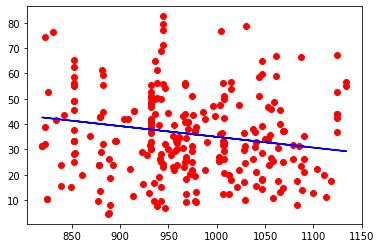

In [30]:
# As can be seen by the plot This variable is a terrible predictor of the target feature
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,con_pred, color='blue')

# Lasso

lasso remove some of the coefficients from the equation in order to train the model on variables it deems more influential over a label.

In [49]:
x_train,x_test,y_train,y_test=train_test_split(concrete_df.values[:,:8],concrete_df.values[:,8])
lasso= linear_model.Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.5829139341945853

In [50]:
# laso did not force any features to be 0
lasso.coef_

array([ 0.12305596,  0.10437546,  0.09285716, -0.12210999,  0.32584131,
        0.01632205,  0.0213415 ,  0.10971221])

lasso uses an alpha paramenter that must be larger than 0 in order t=for the function too work as expected. When alpha is set to 0 the model acts the same as a linear reggression model. I will set the alpha variable to .5 to see how it affects my model

In [51]:
lasso2=linear_model.Lasso(alpha=.5)
lasso2.fit(x_train,y_train)
lasso2.score(x_test,y_test)

0.5820797178079689

Once again the coefficients have not been effected to much by the lasso model. I believe that is because all features in the data set have similar coeffiecients to each other. It actaully increased some coefficients 

In [55]:
lasso2.coef_

array([ 0.12374871,  0.10524382,  0.09325244, -0.11353527,  0.36048661,
        0.01816229,  0.0227249 ,  0.10995294])

In [53]:
lasso2.score(x_train,y_train)

0.6234901531887544

In [39]:
cement_x,cement_y=concrete_df.values[:,:8],concrete_df.values[:,8]

I will employ cross validation on on the two different models to compare which is better. cross validation works by testing the model multiple times on different dubsets of the data set to get an average preformance metric of the models being compared

In [40]:
lasso_cv=cross_val_score(lasso2, cement_x, cement_y)
lasso_cv

array([0.34700897, 0.4080327 , 0.44902636, 0.60477972, 0.50828184])

In [41]:
regr_cv=cross_val_score(regr, cement_x, cement_y)
regr_cv

array([0.33082718, 0.41188352, 0.45161151, 0.60710729, 0.50391324])

Based on the mean preformance by the laso and regr models they preform about the same which makes sense because lasso did not convert the coeficients to zeros.

In [42]:
np.mean(lasso_cv), np.mean(regr_cv)

(0.46342591538362266, 0.4610685474070415)

In [44]:
regr_cv=cross_val_score(regr,cement_x,cement_y,cv=10)

after using 10 different instances of testing for the regr model I found that it was terrible one its averagescore for the data was 27 and itsstandard devaition was much larger meaning it was not a consistant model either.

In [45]:
np.mean(regr_cv),np.std(regr_cv)

(0.2780755819787796, 0.5218688295584426)

Finally I take a look at the mean and standard devaition for the lasso2 model which was terrible. The mean was much smaller than the standard deviation meaning the scores by this model are not consistant at all and on average they are low

In [60]:
lasso2_cv=cross_val_score(lasso2,cement_x,cement_y,cv=10)
np.mean(lasso2_cv), np.std(lasso2_cv)

(0.27766765542749405, 0.5149412889191817)

I am going to try again with different data

In [83]:
fishy_df=pd.read_csv(r'C:\Users\pad39\Downloads\Fish.csv')

In [82]:
cancer_df.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [84]:
fishy_df.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [85]:
x_train,x_test,y_train,y_test=train_test_split(fishy_df.values[:,2:6],fishy_df.values[:,1])

In [86]:
regr=linear_model.LinearRegression()

In [87]:
regr.fit(x_train,y_train)

LinearRegression()

In [88]:
admit_df_pred=regr.predict(x_test)

In [89]:
regr.score(x_test,y_test)

0.816896069483825

In [90]:
regr.coef_

array([105.22973376, -17.73323307, -60.80527966,  51.87339155])

In [95]:
lasso=linear_model.Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

c:\users\pad39\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7151.817561979406, tolerance: 1266.3333209243697
  model = cd_fast.enet_coordinate_descent(


0.8212357516877501

In [96]:
lasso.coef_

array([ 83.18799997,  -0.        , -57.59916731,  49.44191957])

hey look it worked

In [112]:
lasso2=linear_model.Lasso(alpha=10,max_iter=100000)
lasso2.fit(x_train,y_train)
lasso2.score(x_test,y_test)

0.8412858300064178

In [102]:
lasso2.coef_

array([ 42.29208585,   0.        , -18.37560396,  34.0674595 ])

In [103]:
fishy_x,fishy_y=fishy_df.values[:,2:6],fishy_df.values[:,1]

In [121]:
lasso_cv=cross_val_score(lasso2, fishy_x, fishy_y)
lasso_cv

array([ 0.71642445,  0.92211146, -0.47139645,  0.80068762,  0.70199423])

In [122]:
regr_cv=cross_val_score(regr, fishy_x, fishy_y)
regr_cv

array([ 0.77728278,  0.94285283, -0.78407927,  0.86230956,  0.76931819])

In [123]:
np.mean(lasso_cv), np.mean(regr_cv)

(0.5339642605303383, 0.5135368181595913)

The lasso model was just slightly better than the linear regression model in this case